# Project: Investigate a Dataset - [TMDb dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

For my analysis, I will be using **TMDb Movie dataset**.

## Dataset Description

  
  

 This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

  

**The data set contains 21 columns:**

1.  movie_id - A unique identifier for each movie.

2.  imdb_id - A unique identifier for each movie on IMDB.

3.  cast - The name of lead and supporting actors.

4. director - the director of the movie

5. budget - The budget in which the movie was made.

6. genre - The genre of the movie, Action, Comedy ,Thriller etc.

7. homepage - A link to the homepage of the movie.

8. id - This is infact the movie_id as in the first dataset.

9. keywords - The keywords or tags related to the movie.

10. original_title - The title of the movie before translation or adaptation.

11. overview - A brief description of the movie.

12. popularity - A numeric quantity specifying the movie popularity.

13. production_companies - The production house of the movie.

14. production_countries - The country in which it was produced.

15. release_date - The date on which it was released.

16. revenue - The worldwide revenue generated by the movie.

17. runtime - The running time of the movie in minutes.

18. tagline - Movie's tagline.

19. vote_average - average ratings the movie recieved.

20. budget_adj - shows the budget associated movie in terms of 2010 dollars.

21. revenue_adj - shows the revenue associated movie in terms of 2010 dollars.

  

**Some Issues are:**

 - Certain columns, like ‘cast’ and ‘genres’, contain multiple values
   separated by pipe (|) characters.
 - There are some odd characters in the ‘cast’ column.
 - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


# **Questions:**  
   1. <a href=#q1>Is a certain genre more successful than others?/Which genres are most popular?</a>
   2. <a href=#q2>Top 10 movies revenue wise.</a>
   3. <a href=#q3> What kinds of properties are associated with movies that have high revenues?</a>

### Now we start by importing the required libraries for our analysis

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
Let's load the data and see what we have.
    

In [122]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
TMDb_df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")


In [123]:
TMDb_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [124]:
TMDb_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [125]:
TMDb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From these information we can already see that some features won't be relevant in our exploratory analysis as there are
 

 - Lots of missing values (some features have over 50% of the values as zero).

  

 - there are too many features to analyze, so I'm focusing on the ones which can give us real insights in relation to the questions proposed.

First, let's just remove (imdb_id) and the features with NaN values or zero values that we won't need.
    


## Data Cleaning


**Removing unnecessary columns**

 For the questions, I proposed we don't need the columns tagline, keywords,..., id, imdb_id.
The code cell below does drop these columns.

 **We also create different data frames for different analysis due to the limitaions of our data set**

In [126]:
# i will use this dataframe to answer some of the questions with regard to the 2010 dollar values
revenue_budget_2010df =TMDb_df[['id','original_title','runtime','release_year','budget_adj','revenue_adj']].copy()
revenue_budget_2010df.set_index('id',inplace=True)
# this dataframe will be used to answer question related to genre,cast,popularity, etc. 
df=TMDb_df.copy()
# this is another way we can use to choose our data
drop_list = np.array(['tagline','keywords','homepage','budget','overview','runtime','revenue','imdb_id','budget_adj','revenue_adj'])
df.drop(drop_list, inplace=True, axis=1)
df.set_index('id',inplace=True)
#third data frame for genres
genres_df = TMDb_df[['id','original_title','genres','revenue_adj','cast','director']].copy()
genres_df.set_index('id',inplace=True)


In [127]:
df.shape


(10866, 10)

In [128]:
revenue_budget_2010df.shape

(10866, 5)

In [129]:
genres_df.shape

(10866, 5)

**Removing Null Values**

There are too many Null values which can make our analysis hard, normally it shoulp be ubdated or fixed but for time limitation I'm removing them.  

In [130]:
# the function we will use to clear differnt data frames from NaN values
def remove_null(data_frame):
    """
    
    Takes in a dataframe, prints the number of NaN values, remove the NaN values(if any) and prints the dataframe shape
    returns the dataframe to look at for further inspections
    """
    no_nulls = data_frame.isnull().sum()
    print("Total number of NaN values per column:\n{}".format(no_nulls))
    data_frame.dropna(inplace=True)
    print(f"\nThe shape is now: {data_frame.shape}")
    #This will allow us to see the dataframe in the same cell
    return data_frame


In [131]:
# cleaning dataframe df
remove_null(df)

Total number of NaN values per column:
popularity                 0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

The shape is now: (9773, 10)


,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,
135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...
21,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
20379,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
39768,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966


In [132]:
# Cleaning genres_df
remove_null(genres_df)

Total number of NaN values per column:
original_title     0
genres            23
revenue_adj        0
cast              76
director          44
dtype: int64

The shape is now: (10732, 5)


,original_title,genres,revenue_adj,cast,director
id,,,,,
135397,Jurassic World,Action|Adventure|Science Fiction|Thriller,1.392446e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow
76341,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,3.481613e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller
262500,Insurgent,Adventure|Science Fiction|Thriller,2.716190e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke
140607,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,1.902723e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams
168259,Furious 7,Action|Crime|Thriller,1.385749e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan
...,...,...,...,...,...
21,The Endless Summer,Documentary,0.000000e+00,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown
20379,Grand Prix,Action|Adventure|Drama,0.000000e+00,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer
39768,Beregis Avtomobilya,Mystery|Comedy,0.000000e+00,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov


In [133]:
# cleaning dataframe revenue_budget_2010df
remove_null(revenue_budget_2010df)

Total number of NaN values per column:
original_title    0
runtime           0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

The shape is now: (10866, 5)


,original_title,runtime,release_year,budget_adj,revenue_adj
id,,,,,
135397,Jurassic World,124,2015,1.379999e+08,1.392446e+09
76341,Mad Max: Fury Road,120,2015,1.379999e+08,3.481613e+08
262500,Insurgent,119,2015,1.012000e+08,2.716190e+08
140607,Star Wars: The Force Awakens,136,2015,1.839999e+08,1.902723e+09
168259,Furious 7,137,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...
21,The Endless Summer,95,1966,0.000000e+00,0.000000e+00
20379,Grand Prix,176,1966,0.000000e+00,0.000000e+00
39768,Beregis Avtomobilya,94,1966,0.000000e+00,0.000000e+00


 **As you may see from the above cells there are some values of a multible different columns which equal to zero, so we need to drop  those as well.**

In [134]:
# the function we will use to clear differnt data frames from zero values

def remove_zeroes(dataframe):
    """
    Takes in a dataframe, creates a dataframe with the zero values in every columns,
    remove those values from the input dataframe by dropping the dataframe with zeroes 
    returns the input dataframe shape
    
    """
    for col in dataframe.columns:
        zero_rev=dataframe.query(f"{col} == 0")
        dataframe.drop(zero_rev.index,inplace=True)
    return dataframe.shape
     


In [135]:
# check for duplicates and remove them except for The first
def remove_dup(df1):
    print(df1.duplicated().sum())
    df1.drop_duplicates(keep ='first', inplace=True)
    return df1.shape

Let's start removing zeroes from the first dataframe

In [136]:
remove_zeroes(df)

(9773, 10)

Looks like there were no zeroes in *df*

Now we remove the zeroes from the next dataframe

In [137]:
remove_zeroes(revenue_budget_2010df)

(3855, 5)

From 10886 to 3855 That's a lot of bad data

In [138]:
remove_zeroes(genres_df)

(4844, 5)

Again too many zeroes :)



Let's see if there are any duplicates

In [139]:
remove_dup(df)

1


(9772, 10)

In [140]:
remove_dup(revenue_budget_2010df)

1


(3854, 5)

In [141]:
remove_dup(genres_df)

1


(4843, 5)

There was only one duplicate in all of them

In [142]:
revenue_budget_2010df

,original_title,runtime,release_year,budget_adj,revenue_adj
id,,,,,
135397,Jurassic World,124,2015,1.379999e+08,1.392446e+09
76341,Mad Max: Fury Road,120,2015,1.379999e+08,3.481613e+08
262500,Insurgent,119,2015,1.012000e+08,2.716190e+08
140607,Star Wars: The Force Awakens,136,2015,1.839999e+08,1.902723e+09
168259,Furious 7,137,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...
396,Who's Afraid of Virginia Woolf?,131,1966,5.038511e+07,2.266436e+08
5780,Torn Curtain,128,1966,2.015404e+07,8.733419e+07
6644,El Dorado,120,1966,3.125892e+07,4.030809e+07


### **Now we are ready for analysis, so let us look at a few statistics before jumping to the questions**

In [143]:
revenue_budget_2010df.describe()

,runtime,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,109.220291,2001.261028,4.423999e+07,1.370647e+08
std,19.922820,11.282575,4.480925e+07,2.161114e+08
min,15.000000,1960.000000,9.693980e-01,2.370705e+00
25%,95.000000,1995.000000,1.309053e+07,1.835735e+07
50%,106.000000,2004.000000,3.001611e+07,6.173068e+07
75%,119.000000,2010.000000,6.061307e+07,1.632577e+08
max,338.000000,2015.000000,4.250000e+08,2.827124e+09


**As you may notice from the statistics above:**
   1.  there could be mutliples of movies with a budget less than 1 (US dollar) or at least 1
   2.  there could be mutliples of movies with a revenue of 2 (US dollars) or at least 1
   
So one may conclude that some of the data for revenue & budget although being valid technically, they make no sense and erroneous 
(for example: the budget for that movie **F.I.S.T** from Google is 80 million US dollars, while it shows it's 30 dollars). 

In the below cell there is a simple check for outliers to determine whether or not to remove some data from the above data frames

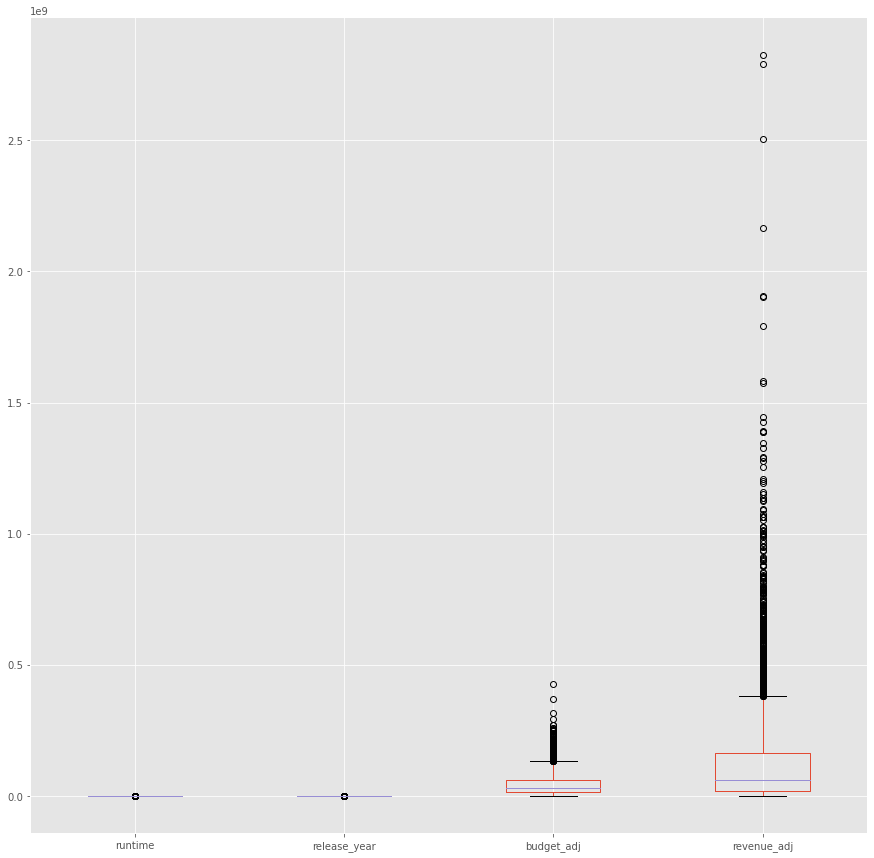

In [144]:
revenue_budget_2010df.boxplot(figsize=(15,15));

**So now we conclude graphically the following that there are some Limitations**:
  1. for the budget of the movies the multible outliers makes the mean = 30 million dollars accounting for the error of this dataset I can't filter the movies based on the mean.
  2. same thing goes for revenue there are at least 10 movies with a revenue of more than 1.5 billion dollars and some of them have over 500 million us dollars.

While i could have replaced some values with the median but it will be misleading. So i didn't.


**Please note that most of the values are full of error due to bad scraping or data entry**

<a id='eda'></a>
## Exploratory Data Analysis



<a id='top'></a>


In [145]:
def draw_bar(dataframe,column,x_axis,y_axis,name):
    """Used to draw necessary bar plots
    Input a dataframe,a column and titles for X and Y axis.
    """
    plt.style.use('ggplot')
    #giving the figure size(width, height)
    plt.figure(figsize=(30,10))
    # name of the axis
    plt.xlabel(x_axis, fontsize = 20)
    plt.ylabel(y_axis, fontsize=20)
    #Name of the graph
    plt.title(name, fontsize=35)
    #giving a histogram plot
    plt.bar(dataframe[x_axis],dataframe[y_axis])
    #displays the plot
    plt.show()

In [146]:
def draw_hist(dataframe,column):
    """Used to draw necessary histogram plots
       Input: a dataframe,a column.
    """
    plt.style.use('dark_background')
    # figure size
    plt.figure(figsize=(10,5))
    #giving a histogram plot
    plt.hist(dataframe[column],bins=int(dataframe.shape[0]/100))
    #displays the plot
    plt.show()

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [147]:
# function get top (criteria,number,data frame)
def get_top(dataframe,number,criteria):
    top_data = dataframe.nlargest(number,criteria)
    return top_data


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html

.<a id='q1'></a>
## Is a certain genre more successful than others? / Which genres are most popular? 

In [148]:
genres_df.genres

id
135397    Action|Adventure|Science Fiction|Thriller
76341     Action|Adventure|Science Fiction|Thriller
262500           Adventure|Science Fiction|Thriller
140607     Action|Adventure|Science Fiction|Fantasy
168259                        Action|Crime|Thriller
                            ...                    
396                                           Drama
5780                               Mystery|Thriller
6644                                 Action|Western
5923             Action|Adventure|Drama|War|Romance
2161                      Adventure|Science Fiction
Name: genres, Length: 4843, dtype: object

**If we look at the genres column we see some of the data are separated with (|) which might make the analysis hard so let's start by solving this issue:**

For doing so, I looked for some <a href=https://nfpdiscussions.udacity.com/t/tmdb-movie-dataset-problem-with-cast-and-genres-columns/144587/3 ><b>help</b></a>.

In [149]:
def split_data(df,col):
    df = df[col].str.split("|", expand=True)
    df = df.stack()
    df = pd.DataFrame(df)
    df.rename(columns={0:f'{col}_adj'},inplace=True)
    return df
   

let's make another data frame with genres first

In [150]:
df_genres=genres_df[['genres']].copy()

In [151]:

df_genres = split_data(df_genres,'genres') 

In [152]:
count = df_genres.genres_adj.value_counts()

**From the above information we see:**
   1. The genre for most of the films in our dataset(after cleaning) is Drama.
   2. Top 4 genres were Drama, Comedy, Thriller, Action. 


### Here are the graphs for the above data:

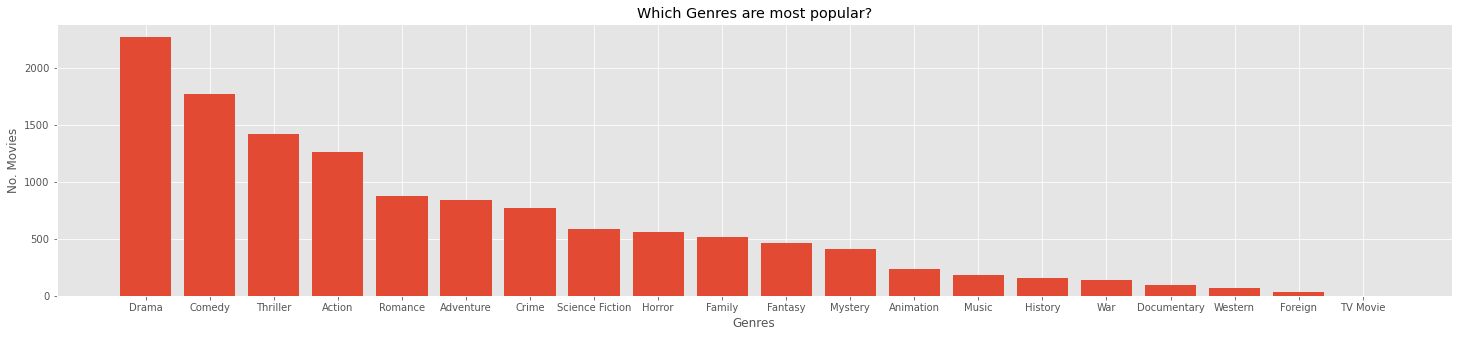

In [153]:
plt.figure(figsize =(25, 5));
plt.title("Which Genres are most popular?")
plt.xlabel('Genres')
plt.ylabel("No. Movies")
plt.bar(count.index,count);

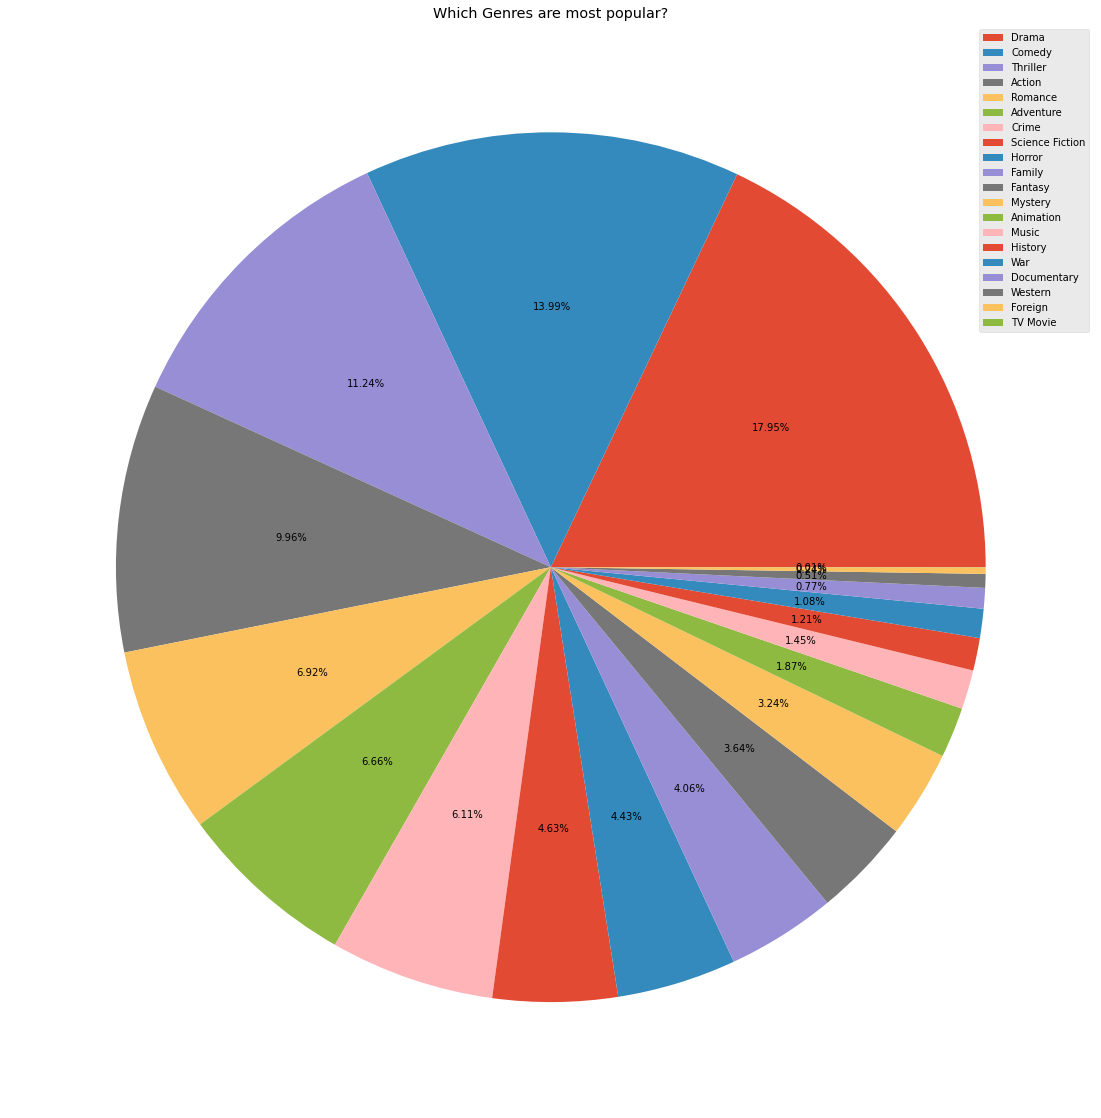

In [154]:
plt.figure(figsize =(20, 20));
plt.title("Which Genres are most popular?")
plt.pie(count, autopct='%1.2f%%', radius=1);
plt.legend(count.index, loc="upper right");

### This answer the second part of our question (which genres are most popular ?)
You see the most popular genres are: **Drama, Comedy, Thriller and Action.**


### To find out (Is a certain genre more succesful than the others?) lets get the top 2000 movies and look at there genres

 **Limitations**  as you saw from the data earlier a one movie could have a multible differnt genres which make them overlap.

In [155]:
top_2000 = get_top(genres_df,2000,'revenue_adj')

In [156]:
top_genres =top_2000.merge(df_genres, left_index=True, right_index=True)

In [157]:
count2 = top_genres.genres_adj.value_counts()

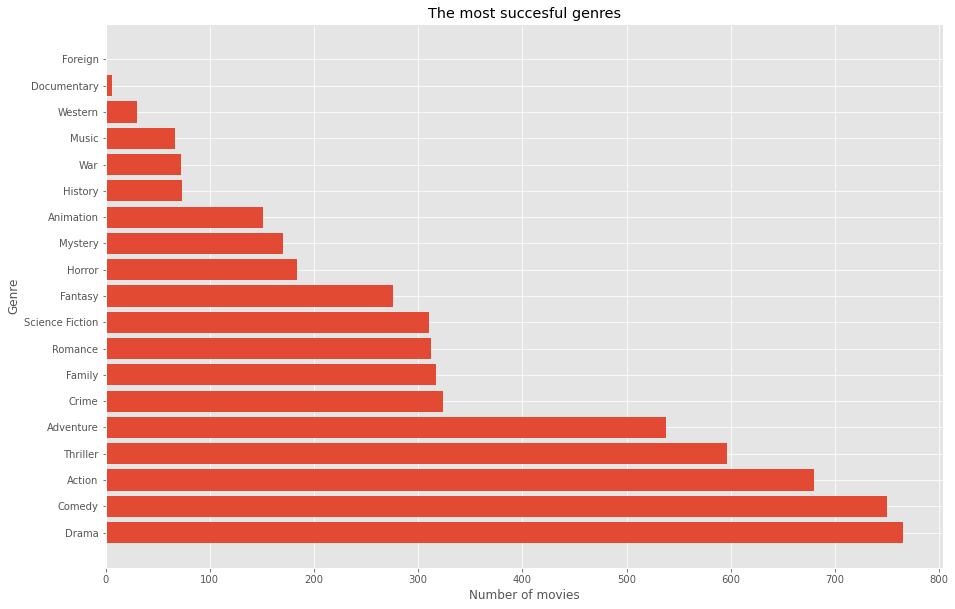

In [158]:
plt.figure(figsize =(15, 10));
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.title('The most succesful genres')
plt.barh(count2.index,count2);

**Drama and Comedy are more succesful than the others.**


As you can see for a higher chance of your movie becoming succesful it should be in  the genres of: 
- Drama
- Comedy
- Thriller
- Action or a mix of them (as most movies in this dataset are.)



<a id='q2'></a><b> Question 2:Top 10 movies revenue wise. <b> 

In [159]:
top_revenue = get_top(revenue_budget_2010df,10,'revenue_adj')
top_revenue[['original_title','revenue_adj']]

,original_title,revenue_adj
id,,
19995,Avatar,2.827124e+09
11,Star Wars,2.789712e+09
597,Titanic,2.506406e+09
9552,The Exorcist,2.167325e+09
578,Jaws,1.907006e+09
140607,Star Wars: The Force Awakens,1.902723e+09
601,E.T. the Extra-Terrestrial,1.791694e+09
1642,The Net,1.583050e+09
12230,One Hundred and One Dalmatians,1.574815e+09


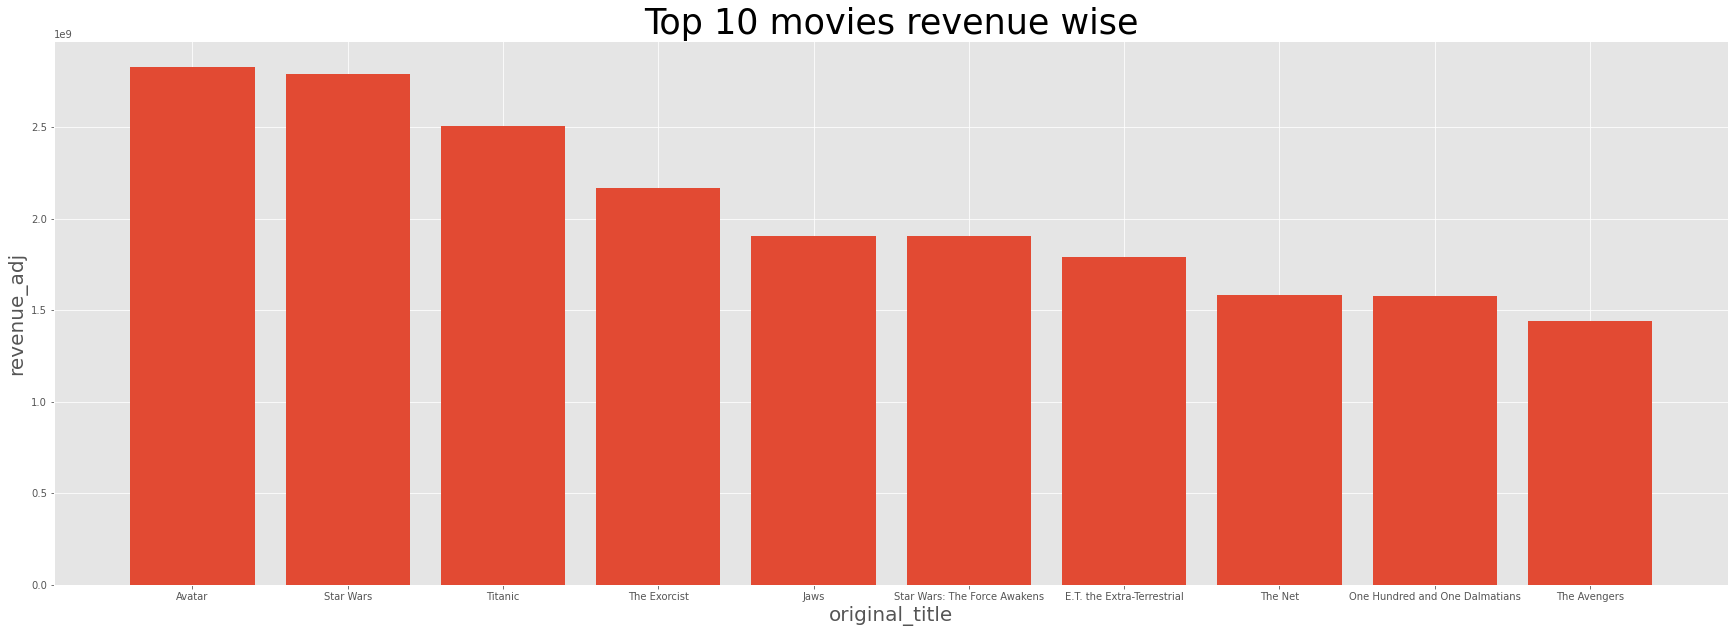

In [160]:
draw_bar(top_revenue,'revenue_adj','original_title','revenue_adj','Top 10 movies revenue wise')

In [161]:
top_revenue[['original_title','revenue_adj']].describe()

,revenue_adj
count,1.000000e+01
mean,2.049305e+09
std,5.048742e+08
min,1.443191e+09
25%,1.635211e+09
50%,1.904864e+09
75%,2.421636e+09
max,2.827124e+09


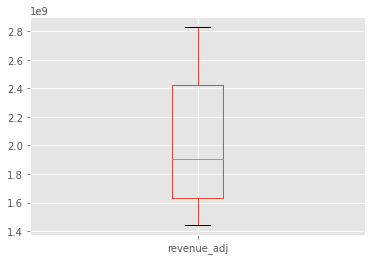

In [162]:
top_revenue[['original_title','revenue_adj']].boxplot();

**Now we see that the top 10 movies are:**

 1. Avatar
 2. Star Wars
 3. Titanic
 4. The Exorcist
 5. Jaws
 6. Star Wars: The Force Awakens
 7. E.T. the Extra-Terrestrial
 8. The Net
 9. One Hundred and One Dalmatians
 10. The Avengers


**We also observe that :**
 
 - The one with the least revenue is *The Avengers* with a revenue of
   1.44 billion US dollars.
 - Avatar is top 1 with a revenue greater than 2.82 billion dollars.
 - 6 movies have generated a revenue that is less than 2 billion dollars and more than 1.44 billion.
 - 4 movies made a revenue more than 2 billion and less than 2.83
   billion.


 **Please note that all revenue are in terms of 2010 US dollars**

<a id='q3'></a>
## What kinds of properties are associated with movies that have high revenues?

To answer this question we will use the insights we gather so far and look for a few more variables like the cast i.e Does having certain people increase the chances of a movie being succesful. 

In [163]:
cast_df = genres_df[['cast']].copy()


In [164]:
cast_df = split_data(cast_df,'cast')
count3 = cast_df.cast_adj.value_counts()


<AxesSubplot:title={'center':'Top 10 most frequent Actors'}, xlabel='Number of movies', ylabel='Actor name'>

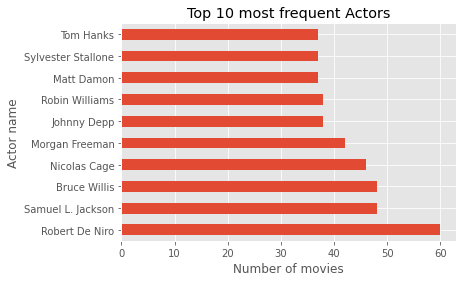

In [165]:
plt.xlabel('Number of movies')
plt.ylabel('Actor name')
plt.title('Top 10 most frequent Actors')
count3.head(10).plot.barh()

In [166]:
count3.head(10)

Robert De Niro        60
Samuel L. Jackson     48
Bruce Willis          48
Nicolas Cage          46
Morgan Freeman        42
Johnny Depp           38
Robin Williams        38
Matt Damon            37
Sylvester Stallone    37
Tom Hanks             37
Name: cast_adj, dtype: int64

**You can see that the most frequent actors were:**
 1. Robert De Niro
 2. Bruce Willis
 3. Samuel L. Jackson
 4. Nicolas Cage
 5. Morgan Freeman
 6. Johnny Depp
 7. Robin Williams
 8. Tom Hanks
 9. Sylvester Stallone


### Now lets see the most frequent actors in the top 100 movies:

In [167]:
top_100 = get_top(genres_df,100,'revenue_adj')

In [168]:
top_cast =top_100.merge(cast_df, left_index=True, right_index=True)

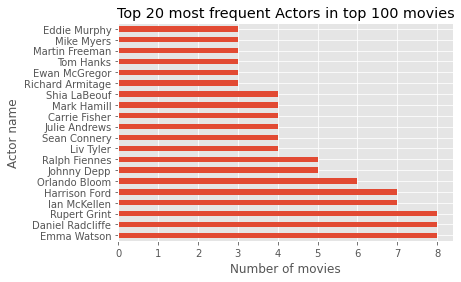

In [169]:
plt.xlabel('Number of movies')
plt.ylabel('Actor name')
plt.title('Top 20 most frequent Actors in top 100 movies')
top_cast.cast_adj.value_counts().head(20).plot.barh();

 **If you want your movies to be successful You should get one of these Actors:**

 - Daniel Radcliffe
 - Emma Watson
 - Rupert Grint
 - Ian McKellen
 - Harrison Ford
 - Orlando Bloom
 - Ralph Fiennes
 - Johnny Depp
 - Julie Andrews
 - Carrie Fisher
 - Sean Connery
 - Mark Hamill
 - Shia LaBeouf
 - Liv Tyler
 - Ian McDiarmid
 - Gary Oldman
 - Elijah Wood
 - Geoffrey Rush
 - Josh Duhamel
 - Tom Hanks


### most frequent director : 

In [170]:
director_df = genres_df[['director']].copy()

In [171]:
director_df = split_data(director_df,'director')

In [172]:
directors_count = director_df.director_adj.value_counts()

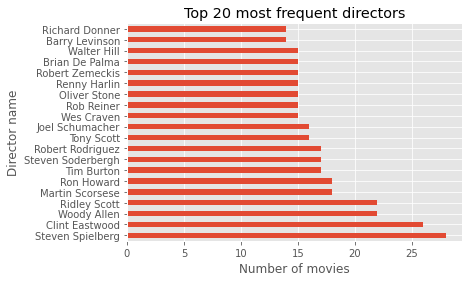

In [173]:
plt.xlabel('Number of movies')
plt.ylabel('Director name')
plt.title('Top 20 most frequent directors')
directors_count.head(20).plot.barh();

**You can see that the most frequent directors are:**

 - Steven Spielberg
 - Clint Eastwood
 - Woody Allen
 - Ridley Scott
 - Martin Scorsese
 - Ron Howard
 - Tim Burton
 - Steven Soderbergh
 - Robert Rodriguez
 - Joel Schumacher
 - Tony Scott
 - Wes Craven
 - Renny Harlin
 - Walter Hill
 - Oliver Stone
 - Brian De Palma
 - Robert Zemeckis
 - Rob Reiner
 - Richard Donner
 - Barry Levinson


#### Now same as we did with the actors:

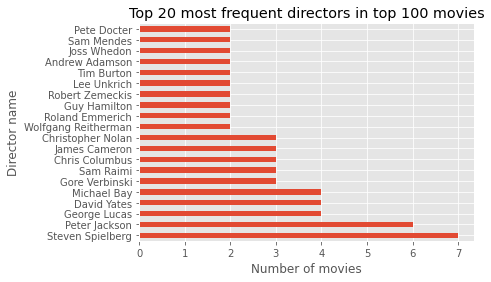

In [174]:
plt.xlabel('Number of movies')
plt.ylabel('Director name')
plt.title('Top 20 most frequent directors in top 100 movies')
top_directors =top_100.merge(director_df, left_index=True, right_index=True)
top_directors.director_adj.value_counts().head(20).plot.barh();

So if you want your movie to be successful you should seek out any of the above directors

## relationship between budget and revenue

In [175]:
top_500 = get_top(revenue_budget_2010df,500,'revenue_adj')

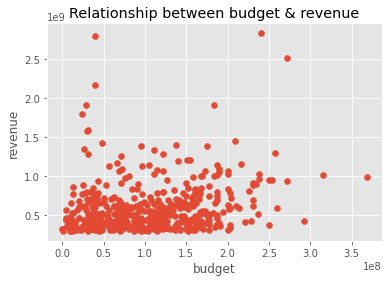

In [176]:
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Relationship between budget & revenue')
plt.scatter(top_500.budget_adj,top_500.revenue_adj)

**As you can see there is a positive correlation between budget and revenue.**

  **Please note**: correlation does not imply causation, you can see that some movies had spent huge budgets but didn't have huge revenue compared to others.

In [177]:
# get the mean budget requried for successful movies
top_500.budget_adj.mean()

102703346.54050991

 So successful movies should have any of the above directors and actors and should have a budget of  over 100 million dollars.

<a id='conclusions'></a>
## Conclusions

### For question 1 :which genres are most popular ?
You see the most popular genres are: Drama, Comedy, Thriller and Action.

### For question 2: top 10 movies
- We see the one with the least revenue is The Avengers with a revenue of 1.44 billion US dollars.   
- Avatar, Is the Top 1 movie with a revenue greater than 2.82 billion dollars.

### For question 3: what kind of properties are associated with movies with high revenues
**actors should be from:** 
 - Daniel Radcliffe
 - Emma Watson
 - Rupert Grint
 - Ian McKellen
 - Harrison Ford
 - Orlando Bloom
 - Ralph Fiennes
 - Johnny Depp
 - Julie Andrews
 - Carrie Fisher
 - Sean Connery
 - Mark Hamill
 - Shia LaBeouf
 - Liv Tyler
 - Ian McDiarmid
 - Gary Oldman
 - Elijah Wood
 - Geoffrey Rush
 - Josh Duhamel
 - Tom Hanks


    
**director should be:**
 - Steven Spielberg
 - Clint Eastwood
 - Woody Allen
 - Ridley Scott
 - Martin Scorsese
 - Ron Howard
 - Tim Burton
 - Steven Soderbergh
 - Robert Rodriguez
 - Joel Schumacher
 - Tony Scott
 - Wes Craven
 - Renny Harlin
 - Walter Hill
 - Oliver Stone
 - Brian De Palma
 - Robert Zemeckis
 - Rob Reiner
 - Richard Donner
 - Barry Levinson


**The movie genre should be:** 
- Drama
- Comedy
- Thriller
- Action

### Data limitations
- As mentioned in the introduction, we have almost half of the movies with zero budgets and zero revenues that might be a problem with the data collection or entry.
So in counting for the financial figures, it is necessary to limit our analysis to the entries with positive budgets or revenues only.

- some of the entries although having positive figures they are not correct (like the movies having a budget of less than 30 dollars and a revenue of less than 30 dollars), I opted not to use the median or mean to replace those values as this might give us inaccurate insight meanwhile the actual figures of those movies may in fact be large or small. So, i just excluded them when analyzing those attributes.

- some columns have multible values separated by ('|') which made it hard to calculate and the overlap of this data made it hard to calculate the most successful genres and the most frequent cast


In [178]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1